In [1]:
#Mount Drive if running in Colab
from sys import path
import os

if 'google.colab' in str(get_ipython()):
  from google.colab import drive

  root_PATH = '/content/drive/My Drive/nlp-seminar/repository'
  drive_mount_location = '/content/drive'

  drive.mount(drive_mount_location, force_remount=True)
  path.append(root_PATH)
else:
  root_PATH = os.path.abspath("..")
  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_location = root_PATH + '/data/data.csv'

In [4]:
data_df = pd.read_csv(data_location)
%store data_df

Stored 'data_df' (DataFrame)


In [15]:
%store -r data_df

In [16]:
#Convert the topics into a list
data_df["Topic"] = data_df["Topic"].apply(eval)

In [17]:
#Convert lists into Pandas series so they can be analized
def list_to_series(series):
 return pd.Series([x for _list in series for x in _list])

In [26]:
topic_counts = list_to_series(data_df["Topic"]).value_counts()
topic_counts.to_excel(root_PATH + '/data/topic-counts.xlsx')
topic_counts

Satisfied users           309161
Bugs                      117622
Design & UX                93069
Dissatisfied users         74313
Performance                56406
Use cases                  53235
Gaming                     45754
Feature Requests           42852
Complexity                 37849
Pricing                    28710
Security & Accounts        28584
Update                     28536
Camera & Photos            28372
Video                      27116
Customer Support           25900
Notifications & Alerts     24644
Frequency                  21840
Advertising                20442
Payment                    19004
Connectivity               18916
Devices                    16859
Audio                      16323
Sign Up & Login            12617
Location Services           7617
Privacy                     5288
Internationalization        4497
Streaming                   3378
Social & Collaboration      1953
Import Export                904
Battery                      661
HDMI      

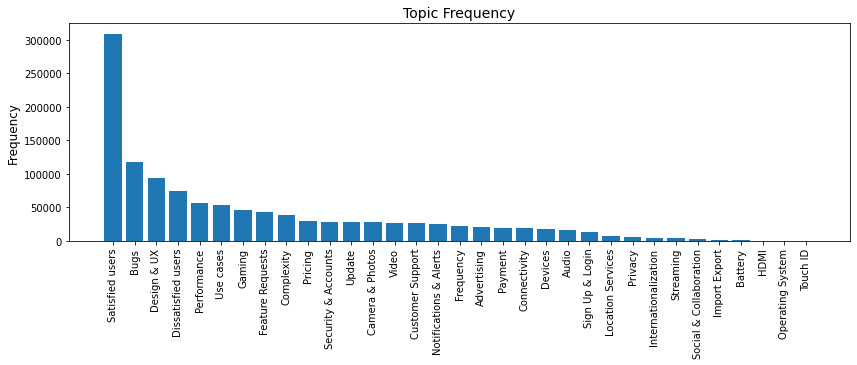

In [19]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(list_to_series(data_df["Topic"]).value_counts().index,
        list_to_series(data_df["Topic"]).value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Topic Frequency", size = 14)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

## Sentiment Distribution

<AxesSubplot:xlabel='Sentiment'>

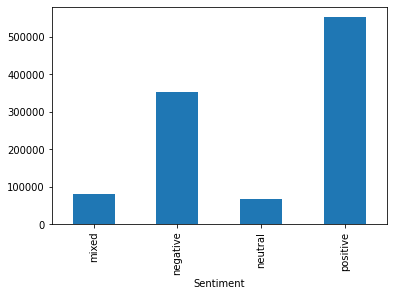

In [20]:
sentiment_distribution = data_df.groupby(['Sentiment']).size()

sentiment_distribution.plot.bar()

## Exploring relationships between sentiment and topic

In [21]:
def boolean_df(item_lists, unique_items):# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [22]:
unique_items_topics = list_to_series(data_df["Topic"]).value_counts().index.tolist()
unique_items_sentiment = data_df["Sentiment"].unique()

data_bool_topics = boolean_df(data_df["Topic"],unique_items_topics)
data_bool_sentiment = boolean_df(data_df["Sentiment"],unique_items_sentiment)

complete_data_bool = data_bool_topics.join(data_bool_sentiment)
complete_data_int = complete_data_bool.astype(int)

In [23]:
freq_mat = np.dot(complete_data_int.T, complete_data_int)

In [24]:
freq = pd.DataFrame(freq_mat, columns = complete_data_int.columns.tolist(), index = complete_data_int.columns.tolist())
sentiment_topic_relationship = freq.drop(data_bool_topics)
sentiment_topic_relationship

,Satisfied users,Bugs,Design & UX,Dissatisfied users,Performance,Use cases,Gaming,Feature Requests,Complexity,Pricing,...,Social & Collaboration,Import Export,Battery,HDMI,Operating System,Touch ID,positive,mixed,negative,neutral
positive,279071,5384,42361,0,11118,34528,21459,8263,29223,5745,...,880,155,41,17,2,11,552195,0,0,0
mixed,15609,13612,5520,102,5056,2602,3775,5387,1234,1904,...,195,89,57,10,8,8,0,79193,0,0
negative,0,93410,39793,73748,37119,12055,16900,24107,5536,19133,...,617,569,522,72,86,46,0,0,350812,0
neutral,14481,5216,5395,463,3113,4050,3620,5095,1856,1928,...,261,91,41,11,8,8,0,0,0,66375


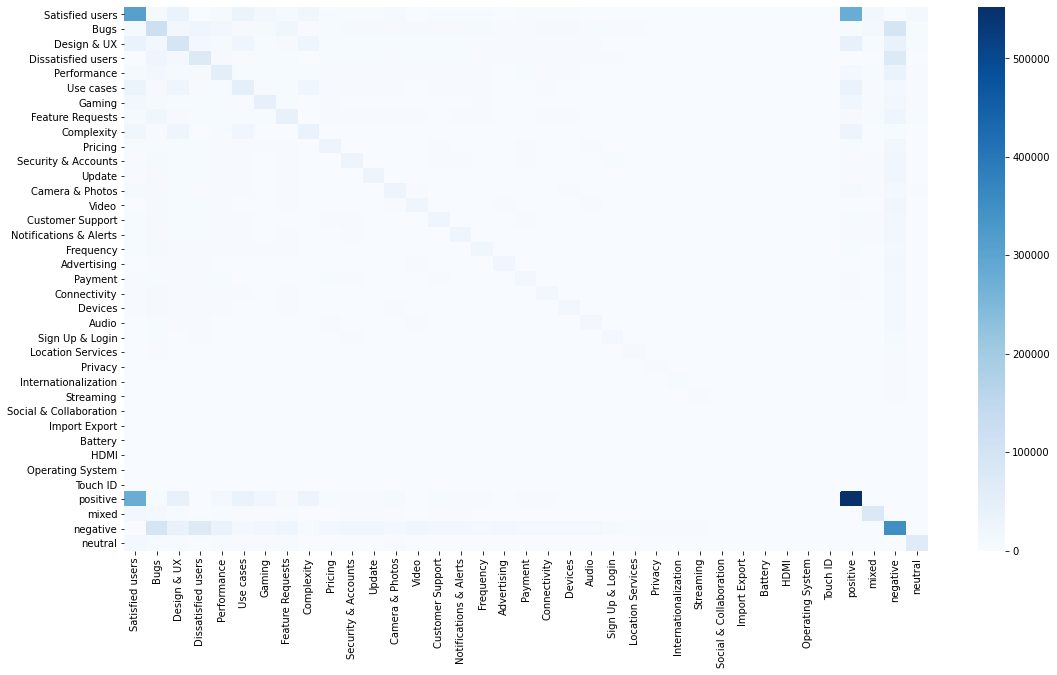

In [25]:
import seaborn as sn

fig, ax = plt.subplots(figsize = (18,10))
sn.heatmap(freq, cmap = "Blues")
plt.xticks(rotation=90)
plt.savefig("heatmap.png", dpi = 300)